In [2]:
#1 is yes 0 is no
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
BASE_DIR = "../input/customerattritionprediction/"
train = pd.read_csv(f'{BASE_DIR}train.csv')
test = pd.read_csv(f'{BASE_DIR}test.csv')
sample_sub = pd.read_csv(f'{BASE_DIR}Sample Submission.csv')

# Data Understanding

In [4]:
train.head(2)

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment,CustomerAttrition
0,B60LHTZLLPFU4IULNPUF,Female,No,No,Yes,48,Yes,Wifi Broadband,No,Yes,Yes,No,Check,96.259802,4628.129119,Yes
1,1RUJ7ONYZHYTWKOKO1SD,Male,No,Yes,No,45,Yes,Wifi Broadband,No,No,No,Yes,Bank,18.876470,922.085998,No


In [5]:
test.head(2)

,ID,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
0,WMORTPCG3HTIPEFSGUFY,Male,No,No,No,8,Yes,Wifi Broadband,No,No,No,Yes,Check,21.299937,151.092519
1,GBLPEA16C3KGBO57KEFO,Female,No,No,No,26,Yes,Satellite Broadband,No,Yes,No,Yes,Check,56.609623,1553.276979


In [6]:
sample_sub.head(2)

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No


In [7]:
print(f'Shape of training data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of training data: (6338, 16)
Shape of test data: (705, 15)


In [8]:
print(f'no. of training examples: {len(train)}')
print(f'no. of test examples: {len(test)}')

no. of training examples: 6338
no. of test examples: 705


In [10]:
train.columns

Index(['ID', 'sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment', 'CustomerAttrition'],
      dtype='object')

In [11]:
train.isna().sum()

ID                      0
sex                     0
Aged                    0
Married                 0
TotalDependents         0
ServiceSpan             0
MobileService           0
4GService               0
CyberProtection         0
HardwareSupport         0
TechnicalAssistance     0
FilmSubscription        0
SettlementProcess       0
QuarterlyPayment        0
GrandPayment           10
CustomerAttrition       0
dtype: int64

In [12]:
test.isna().sum()

ID                     0
sex                    0
Aged                   0
Married                0
TotalDependents        0
ServiceSpan            0
MobileService          0
4GService              0
CyberProtection        0
HardwareSupport        0
TechnicalAssistance    0
FilmSubscription       0
SettlementProcess      0
QuarterlyPayment       0
GrandPayment           1
dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6338 non-null   object 
 1   sex                  6338 non-null   object 
 2   Aged                 6338 non-null   object 
 3   Married              6338 non-null   object 
 4   TotalDependents      6338 non-null   object 
 5   ServiceSpan          6338 non-null   int64  
 6   MobileService        6338 non-null   object 
 7   4GService            6338 non-null   object 
 8   CyberProtection      6338 non-null   object 
 9   HardwareSupport      6338 non-null   object 
 10  TechnicalAssistance  6338 non-null   object 
 11  FilmSubscription     6338 non-null   object 
 12  SettlementProcess    6338 non-null   object 
 13  QuarterlyPayment     6338 non-null   float64
 14  GrandPayment         6328 non-null   float64
 15  CustomerAttrition    6338 non-null   o

# EDA

<AxesSubplot:xlabel='CustomerAttrition', ylabel='count'>

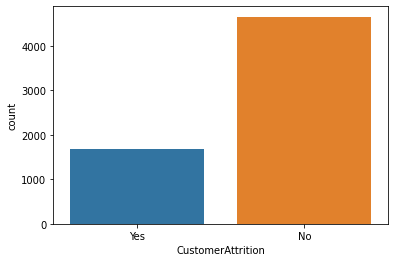

In [14]:
sns.countplot(train['CustomerAttrition'])

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   705 non-null    object 
 1   sex                  705 non-null    object 
 2   Aged                 705 non-null    object 
 3   Married              705 non-null    object 
 4   TotalDependents      705 non-null    object 
 5   ServiceSpan          705 non-null    int64  
 6   MobileService        705 non-null    object 
 7   4GService            705 non-null    object 
 8   CyberProtection      705 non-null    object 
 9   HardwareSupport      705 non-null    object 
 10  TechnicalAssistance  705 non-null    object 
 11  FilmSubscription     705 non-null    object 
 12  SettlementProcess    705 non-null    object 
 13  QuarterlyPayment     705 non-null    float64
 14  GrandPayment         704 non-null    float64
dtypes: float64(2), int64(1), object(12)
memo

In [16]:
for col in train.columns:
    print(f'{col}: cardinality: {train[col].nunique()}')

ID: cardinality: 6338
sex: cardinality: 2
Aged: cardinality: 2
Married: cardinality: 2
TotalDependents: cardinality: 2
ServiceSpan: cardinality: 76
MobileService: cardinality: 2
4GService: cardinality: 3
CyberProtection: cardinality: 2
HardwareSupport: cardinality: 2
TechnicalAssistance: cardinality: 2
FilmSubscription: cardinality: 2
SettlementProcess: cardinality: 4
QuarterlyPayment: cardinality: 6338
GrandPayment: cardinality: 6328
CustomerAttrition: cardinality: 2


**Insights**:-<br>
Binary Features:-<br>
sex, Aged, Married, TotalDependents, MobileService, CyberProtection, HardwareSupport, TechnicalAssistance,
FilmSubscription

Categorical Features:-<br>
4GService, SettlementProcess, ServiceSpan

Continuous Features:- <br>
QuarterlyPayment, GrandPayment

Target:- <br>
CustomerAttrition

<AxesSubplot:xlabel='QuarterlyPayment', ylabel='Count'>

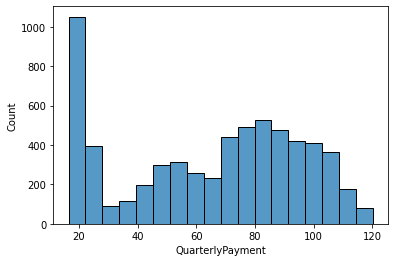

In [17]:
sns.histplot(train['QuarterlyPayment'])

<AxesSubplot:ylabel='Count'>

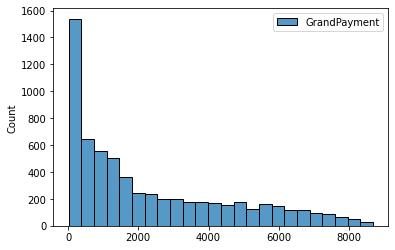

In [18]:
sns.histplot(train[['GrandPayment']])

<AxesSubplot:xlabel='ServiceSpan', ylabel='Count'>

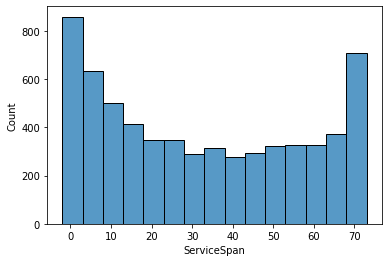

In [19]:
sns.histplot(train['ServiceSpan'])

<AxesSubplot:ylabel='QuarterlyPayment'>

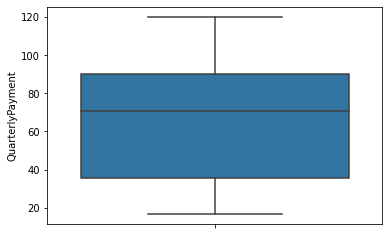

In [20]:
sns.boxplot(y=train['QuarterlyPayment'])

<AxesSubplot:ylabel='GrandPayment'>

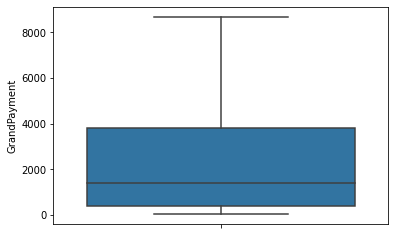

In [21]:
sns.boxplot(y=train['GrandPayment'])

<AxesSubplot:ylabel='ServiceSpan'>

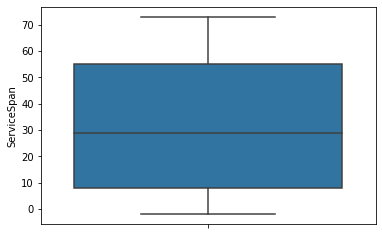

In [22]:
sns.boxplot(y=train['ServiceSpan'])

In [23]:
train[['QuarterlyPayment','GrandPayment','ServiceSpan']].corr()

,QuarterlyPayment,GrandPayment,ServiceSpan
QuarterlyPayment,1.000000,0.652655,0.249470
GrandPayment,0.652655,1.000000,0.824522
ServiceSpan,0.249470,0.824522,1.000000


IndexError: list index out of range

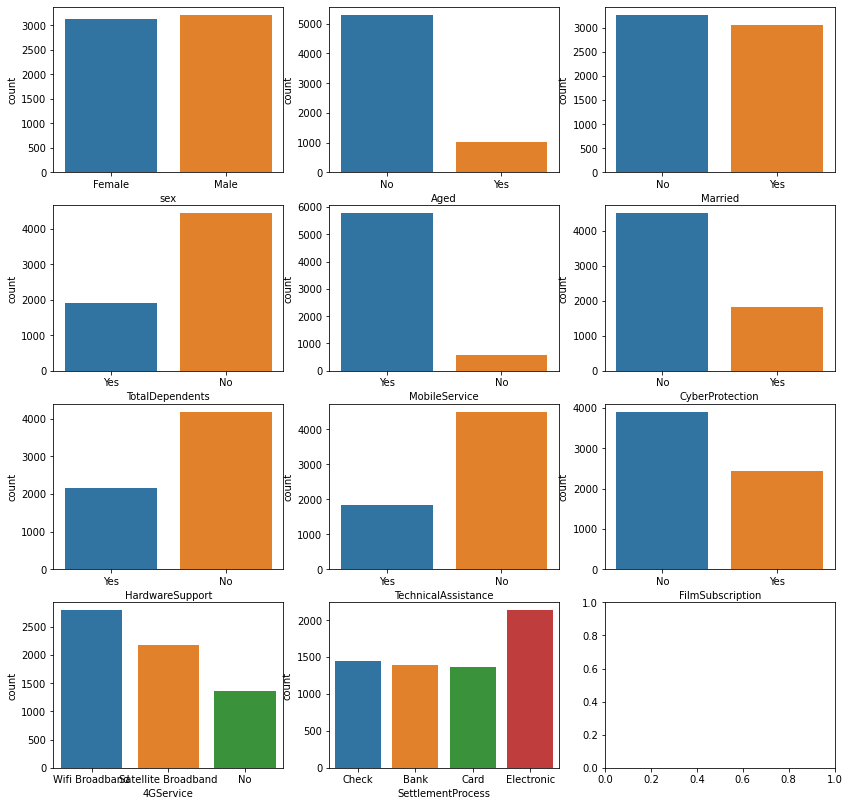

In [24]:
col_cat = ['sex', 'Aged', 'Married', 'TotalDependents', 'MobileService', 'CyberProtection', 'HardwareSupport', 'TechnicalAssistance', 'FilmSubscription', '4GService', 'SettlementProcess']
plt.figure(figsize=(14,14))
for i in range(12):
    plt.subplot(4,3,i+1)
#     plt.title(f'{col_cat[i]}')
    sns.countplot(x=train[col_cat[i]])

# Modeling

In [42]:
from xgboost import XGBClassifier
BASE_DIR = "../input/customerattritionprediction/"

train = pd.read_csv(f'{BASE_DIR}train.csv')

test = pd.read_csv(f'{BASE_DIR}test.csv')

sample_sub = pd.read_csv(f'{BASE_DIR}Sample Submission.csv')

In [43]:
cat_features = ['sex', 'Aged', 'Married', 'TotalDependents', 'MobileService', 'CyberProtection', 'HardwareSupport', 'TechnicalAssistance', 'FilmSubscription', '4GService', 'SettlementProcess']
cont_features = ['QuarterlyPayment','GrandPayment', 'ServiceSpan']
labelmap={"Yes":1,"No":0}
train['CustomerAttrition']=train['CustomerAttrition'].map(labelmap)

target = train["CustomerAttrition"]

train['GrandPayment'].fillna(train['GrandPayment'].median(),inplace=True)
test['GrandPayment'].fillna(test['GrandPayment'].median(),inplace=True)

In [44]:
from category_encoders import LeaveOneOutEncoder
from sklearn.preprocessing import LabelEncoder

xgb_cat_features = []
lgb_cat_features = []
cb_cat_features = []
ridge_cat_features = []
lr_cat_features = []
hgbc_cat_features = []
nn_cat_features = []

loo_features = []
le_features = []

def label_encode(train_df, test_df, column):
    le = LabelEncoder()
    new_feature = "{}_le".format(column)
    le.fit(train_df[column].unique().tolist() + test_df[column].unique().tolist())
    train_df[new_feature] = le.transform(train_df[column])
    test_df[new_feature] = le.transform(test_df[column])
    return new_feature

def loo_encode(train_df, test_df, column):
    loo = LeaveOneOutEncoder()
    new_feature = "{}_loo".format(column)
    loo.fit(train_df[column], train_df["CustomerAttrition"])
    train_df[new_feature] = loo.transform(train_df[column])
    test_df[new_feature] = loo.transform(test_df[column])
    return new_feature

for feature in cat_features:
    loo_features.append(loo_encode(train, test, feature))
    le_features.append(label_encode(train, test, feature))
    
xgb_cat_features.extend(loo_features)
lgb_cat_features.extend(le_features)
cb_cat_features.extend(cat_features)
ridge_cat_features.extend(loo_features)
lr_cat_features.extend(loo_features)
hgbc_cat_features.extend(loo_features)
nn_cat_features.extend(loo_features)

In [45]:
import warnings
warnings.filterwarnings("ignore")

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from keras.models import Model, load_model
from keras.layers import Dropout, Dense, BatchNormalization, Embedding, Input, Concatenate, SpatialDropout1D, Reshape, Flatten, concatenate, Activation, LeakyReLU
from keras.metrics import AUC
from tensorflow.keras import utils
from tensorflow.keras.utils import get_custom_objects
from keras.optimizers import Adam, SGD
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
# get_custom_objects().update({'gelu': Activation(gelu)})
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})



random_state = 2021
# n_folds = 10
n_folds = 5
k_fold = StratifiedKFold(n_splits=n_folds, random_state=random_state, shuffle=True)

xgb_train_preds = np.zeros(len(train.index), )
xgb_test_preds = np.zeros(len(test.index), )
xgb_features = xgb_cat_features + cont_features

lgb_train_preds = np.zeros(len(train.index), )
lgb_test_preds = np.zeros(len(test.index), )
lgb_features = lgb_cat_features + cont_features

cb_train_preds = np.zeros(len(train.index), )
cb_test_preds = np.zeros(len(test.index), )
cb_features = cb_cat_features + cont_features

ridge_train_preds = np.zeros(len(train.index), )
ridge_test_preds = np.zeros(len(test.index), )
ridge_features = ridge_cat_features + cont_features

lr_train_preds = np.zeros(len(train.index), )
lr_test_preds = np.zeros(len(test.index), )
lr_features = lr_cat_features + cont_features

hgbc_train_preds = np.zeros(len(train.index), )
hgbc_test_preds = np.zeros(len(test.index), )
hgbc_features = hgbc_cat_features + cont_features

nn_train_preds = np.zeros(len(train.index), )
nn_test_preds = np.zeros(len(test.index), )
nn_features = nn_cat_features + cont_features

for fold, (train_index, test_index) in enumerate(k_fold.split(train, target)):
    print("--> Fold {}".format(fold + 1))
    y_train = target.iloc[train_index]
    y_valid = target.iloc[test_index]

    xgb_x_train = pd.DataFrame(train[xgb_features].iloc[train_index])
    xgb_x_valid = pd.DataFrame(train[xgb_features].iloc[test_index])

    lgb_x_train = pd.DataFrame(train[lgb_features].iloc[train_index])
    lgb_x_valid = pd.DataFrame(train[lgb_features].iloc[test_index])

    cb_x_train = pd.DataFrame(train[cb_features].iloc[train_index])
    cb_x_valid = pd.DataFrame(train[cb_features].iloc[test_index])

    ridge_x_train = pd.DataFrame(train[ridge_features].iloc[train_index])
    ridge_x_valid = pd.DataFrame(train[ridge_features].iloc[test_index])

    lr_x_train = pd.DataFrame(train[lr_features].iloc[train_index])
    lr_x_valid = pd.DataFrame(train[lr_features].iloc[test_index])

    hgbc_x_train = pd.DataFrame(train[hgbc_features].iloc[train_index])
    hgbc_x_valid = pd.DataFrame(train[hgbc_features].iloc[test_index])
    
    nn_x_train = pd.DataFrame(train[nn_features].iloc[train_index])
    nn_x_valid = pd.DataFrame(train[nn_features].iloc[test_index])
    
    #XGBoost Classfier
    xgb_model = XGBClassifier(
        seed=random_state,
        n_estimators=10000,
        verbosity=1,
        eval_metric="auc",
#         tree_method="gpu_hist",
#         gpu_id=0,
        alpha=7.105038963844129,
        colsample_bytree=0.25505629740052566,
        gamma=0.4999381950212869,
        reg_lambda=1.7256912198205319,
        learning_rate=0.011823142071967673,
        max_bin=338,
        max_depth=8,
        min_child_weight=2.286836198630466,
        subsample=0.618417952155855,
    )
    xgb_model.fit(
        xgb_x_train,
        y_train,
        eval_set=[(xgb_x_valid, y_valid)], 
        verbose=0,
        early_stopping_rounds=200
    )

    train_oof_preds = xgb_model.predict_proba(xgb_x_valid)[:,1]
    train_oof_classes = xgb_model.predict(xgb_x_valid)[:]
    test_oof_preds = xgb_model.predict_proba(test[xgb_features])[:,1]
    xgb_train_preds[test_index] = train_oof_preds
    xgb_test_preds += test_oof_preds / n_folds
    print(": XGB - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": XGB - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')

    #LGBM Classifer
    lgb_model = LGBMClassifier(
        cat_feature=[x for x in range(len(lgb_cat_features))],
        random_state=random_state,
        cat_l2=25.999876242730252,
        cat_smooth=89.2699690675538,
        colsample_bytree=0.2557260109926193,
        early_stopping_round=200,
        learning_rate=0.00918685483594994,
        max_bin=788,
        max_depth=81,
        metric="auc",
        min_child_samples=292,
        min_data_per_group=177,
        n_estimators=1600000,
        n_jobs=-1,
        num_leaves=171,
        reg_alpha=0.7115353581785044,
        reg_lambda=5.658115293998945,
        subsample=0.9262904583735796,
        subsample_freq=1,
        verbose=-1,
    )
    lgb_model.fit(
        lgb_x_train,
        y_train,
        eval_set=[(lgb_x_valid, y_valid)], 
        verbose=0,
    )

    train_oof_preds = lgb_model.predict_proba(lgb_x_valid)[:,1]
    train_oof_classes = lgb_model.predict(lgb_x_valid)[:]
    test_oof_preds = lgb_model.predict_proba(test[lgb_features])[:,1]
    lgb_train_preds[test_index] = train_oof_preds
    lgb_test_preds += test_oof_preds / n_folds
    print(": LGB - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": LGB - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')

    # CatBoost Model
    cb_model = CatBoostClassifier(
        verbose=0,
        eval_metric="AUC",
        loss_function="Logloss",
        random_state=random_state,
        num_boost_round=20000,
        od_type="Iter",
        od_wait=200,
#         task_type="GPU",
#         devices="0",
        cat_features=[x for x in range(len(cb_cat_features))],
        bagging_temperature=1.288692494969795,
        grow_policy="Depthwise",
        l2_leaf_reg=9.847870133539244,
        learning_rate=0.01877982653902465,
        max_depth=8,
        min_data_in_leaf=1,
        penalties_coefficient=2.1176668909602734,
    )
    cb_model.fit(
        cb_x_train,
        y_train,
        eval_set=[(cb_x_valid, y_valid)], 
        verbose=0,
    )

    train_oof_preds = cb_model.predict_proba(cb_x_valid)[:,1]
    train_oof_classes = cb_model.predict(cb_x_valid)[:]
    test_oof_preds = cb_model.predict_proba(test[cb_features])[:,1]
    cb_train_preds[test_index] = train_oof_preds
    cb_test_preds += test_oof_preds / n_folds
    print(": CB - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": CB - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')
    
    #Ridge Classifer
    ridge_model = CalibratedClassifierCV(
        RidgeClassifier(random_state=random_state),
        cv=3,
    )
    ridge_model.fit(
        ridge_x_train,
        y_train,
    )

    train_oof_preds = ridge_model.predict_proba(ridge_x_valid)[:,-1]
    train_oof_classes = ridge_model.predict(ridge_x_valid)
    test_oof_preds = ridge_model.predict_proba(test[ridge_features])[:,-1]
    ridge_train_preds[test_index] = train_oof_preds
    ridge_test_preds += test_oof_preds / n_folds
    print(": Ridge - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": Ridge - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')
    
    #Logistic Regression Model
    lr_model = CalibratedClassifierCV(
        LogisticRegression(
            random_state=random_state,
        ),
        cv=3,
    )
    lr_model.fit(
        lr_x_train,
        y_train,
    )

    train_oof_preds = lr_model.predict_proba(lr_x_valid)[:,-1]
    train_oof_classes = lr_model.predict(lr_x_valid)
    test_oof_preds = lr_model.predict_proba(test[lr_features])[:,-1]
    lr_train_preds[test_index] = train_oof_preds
    lr_test_preds += test_oof_preds / n_folds
    print(": LR - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": LR - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')
    
    
    # HistGradientBoosting Classifer
    hgbc_model = HistGradientBoostingClassifier(
        l2_regularization=1.766059063693552,
        learning_rate=0.10675193678150449,
        max_bins=128,
        max_depth=31,
        max_leaf_nodes=185,
        random_state=2021
    )
    hgbc_model.fit(
        hgbc_x_train,
        y_train,
    )

    train_oof_preds = hgbc_model.predict_proba(hgbc_x_valid)[:,-1]
    train_oof_classes = hgbc_model.predict(hgbc_x_valid)
    test_oof_preds = hgbc_model.predict_proba(test[hgbc_features])[:,-1]
    hgbc_train_preds[test_index] = train_oof_preds
    hgbc_test_preds += test_oof_preds / n_folds
    print(": HGBC - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": HGBC - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')
    
    #Neural Network
    CFG = {
    'feature_selection_dropout' : 0.2,
    'categorical_dropout' : 0.1,
    'first_dense' : 256,
    'second_dense' : 256,
    'dense_dropout' : 0.2,
    'activation_type' : 'leaky-relu',
    'activation' : 'sigmoid',
    'epochs' : 200,
    'loss' : 'binary_crossentropy',
    'optimizer' : Adam(0.003),
    'mon_metrics' : 'val_accuracy',
    'num_folds' : 5,
      }
    
    nn_model = Sequential()
    nn_model.add(Dense(128, input_dim=len(nn_features), activation='leaky-relu'))
    nn_model.add(Dense(128, activation='leaky-relu'))
    nn_model.add(Dense(1, activation='sigmoid'))
    nn_model.compile(loss=CFG['loss'], optimizer=CFG['optimizer'], metrics=['accuracy','AUC'])

    
    es = EarlyStopping(monitor = CFG['mon_metrics'], min_delta = 0.001, patience = 20,
                    verbose = 1, mode = 'max', baseline = None, restore_best_weights = True)

    rlr = ReduceLROnPlateau(monitor=CFG['mon_metrics'], factor = 0.5, patience=5, mode='max', verbose=0, min_lr = 1e-6)
    
                                        
    nn_model.fit(nn_x_train,
              y_train,
              validation_data = (nn_x_valid, y_valid),
              verbose = 0,
              batch_size = 10,
              callbacks=[es],
              epochs=CFG['epochs'],
             )
    
    train_oof_preds = nn_model.predict_proba(nn_x_valid)[:,-1]
    train_oof_classes = nn_model.predict_classes(nn_x_valid)
    test_oof_preds = nn_model.predict_proba(test[nn_features])[:,-1]
    nn_train_preds[test_index] = train_oof_preds
    nn_test_preds += test_oof_preds / n_folds
    
    print(": NN - ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": NN - Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print(' -----------------------------------')
    print("")
    
print("--> Overall metrics")
print(": XGB - ROC AUC Score = {}".format(roc_auc_score(target, xgb_train_preds, average="micro")))
print(": XGB - Accuracy Score = {}".format(accuracy_score(target, np.round(xgb_train_preds))))
print(' -----------------------------------')
print(": LGB - ROC AUC Score = {}".format(roc_auc_score(target, lgb_train_preds, average="micro")))
print(": LGB - Accuracy Score = {}".format(accuracy_score(target, np.round(lgb_train_preds))))
print(' -----------------------------------')
print(": CB - ROC AUC Score = {}".format(roc_auc_score(target, cb_train_preds, average="micro")))
print(": CB - Accuracy Score = {}".format(accuracy_score(target, np.round(cb_train_preds))))
print(' -----------------------------------')
print(": Ridge - ROC AUC Score = {}".format(roc_auc_score(target, ridge_train_preds, average="micro")))
print(": Ridge - Accuracy Score = {}".format(accuracy_score(target, np.round(ridge_train_preds))))
print(' -----------------------------------')
print(": LR - ROC AUC Score = {}".format(roc_auc_score(target, lr_train_preds, average="micro")))
print(": LR - Accuracy Score = {}".format(accuracy_score(target, np.round(lr_train_preds))))
print(' -----------------------------------')
print(": HGBC - ROC AUC Score = {}".format(roc_auc_score(target, hgbc_train_preds, average="micro")))
print(": HGBC - Accuracy Score = {}".format(accuracy_score(target, np.round(hgbc_train_preds))))
print(' -----------------------------------')
print(": NN - ROC AUC Score = {}".format(roc_auc_score(target, nn_train_preds, average="micro")))
print(": NN - Accuracy Score = {}".format(accuracy_score(target, np.round(nn_train_preds))))
print(' -----------------------------------')


--> Fold 1
: XGB - ROC AUC Score = 0.8129518572450439
: XGB - Accuracy Score = 0.7957413249211357
 -----------------------------------
: LGB - ROC AUC Score = 0.8090352288984264
: LGB - Accuracy Score = 0.7902208201892744
 -----------------------------------
: CB - ROC AUC Score = 0.8245947654812998
: CB - Accuracy Score = 0.7933753943217665
 -----------------------------------
: Ridge - ROC AUC Score = 0.8173506795422032
: Ridge - Accuracy Score = 0.7917981072555205
 -----------------------------------
: LR - ROC AUC Score = 0.7905266452074392
: LR - Accuracy Score = 0.7862776025236593
 -----------------------------------
: HGBC - ROC AUC Score = 0.7962586858777845
: HGBC - Accuracy Score = 0.7760252365930599
 -----------------------------------
Restoring model weights from the end of the best epoch.
Epoch 00054: early stopping
: NN - ROC AUC Score = 0.7678922695687718
: NN - Accuracy Score = 0.7862776025236593
 -----------------------------------

--> Fold 2
: XGB - ROC AUC Score = 0

--> Fold 1
: ROC AUC Score = 0.8510499693439608
: Accuracy Score = 0.8280757097791798

--> Fold 2
: ROC AUC Score = 0.7977467811158798
: Accuracy Score = 0.7586750788643533

--> Fold 3
: ROC AUC Score = 0.8558144287758022
: Accuracy Score = 0.7996845425867508

--> Fold 4
: ROC AUC Score = 0.8261802575107295
: Accuracy Score = 0.7886435331230284

--> Fold 5
: ROC AUC Score = 0.8120784794604539
: Accuracy Score = 0.7902208201892744

--> Fold 6
: ROC AUC Score = 0.8311363171878193
: Accuracy Score = 0.7996845425867508

--> Fold 7
: ROC AUC Score = 0.8339720008174942
: Accuracy Score = 0.8123028391167192

--> Fold 8
: ROC AUC Score = 0.8572578172900062
: Accuracy Score = 0.805993690851735

--> Fold 9
: ROC AUC Score = 0.8289298515104966
: Accuracy Score = 0.7883096366508688

--> Fold 10
: ROC AUC Score = 0.8485023041474654
: Accuracy Score = 0.8041074249605056

--> Overall metrics
: ROC AUC Score = 0.8335426506368971
: Accuracy Score = 0.7975702114231619


NameError: name 'sklearn' is not defined

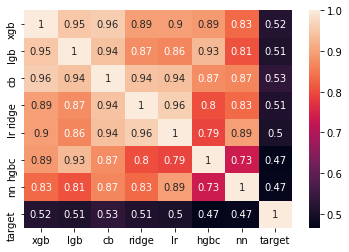

In [46]:
from scipy.special import expit
from sklearn.calibration import CalibratedClassifierCV

random_state = 2021
n_folds = 10
k_fold = StratifiedKFold(n_splits=n_folds, random_state=random_state, shuffle=True)

l1_train = pd.DataFrame(data={
    "xgb": xgb_train_preds.tolist(),
    "lgb": lgb_train_preds.tolist(),
    "cb": cb_train_preds.tolist(),
    "ridge": ridge_train_preds.tolist(),
    "lr": lr_train_preds.tolist(),
    "hgbc": hgbc_train_preds.tolist(),
    "nn" : nn_train_preds.tolist(),
    "target": target.tolist()
})
l1_test = pd.DataFrame(data={
    "xgb": xgb_test_preds.tolist(),
    "lgb": lgb_test_preds.tolist(),
    "cb": cb_test_preds.tolist(),
    "lr": lr_test_preds.tolist(),
    "ridge": ridge_test_preds.tolist(),    
    "hgbc": hgbc_test_preds.tolist(),
    "nn" : nn_test_preds.tolist()
})


# Compute the correlation matrix
corr = l1_train.corr()


sns.heatmap(corr, annot=True)
# pd.set_option("max_rows", None)
# l1_train
train_preds = np.zeros(len(l1_train.index), )
test_preds = np.zeros(len(l1_test.index), )
features = ["cb", "ridge", "lr", "hgbc"]

for fold, (train_index, test_index) in enumerate(k_fold.split(l1_train, target)):
    print("--> Fold {}".format(fold + 1))
    y_train = target.iloc[train_index]
    y_valid = target.iloc[test_index]

    x_train = pd.DataFrame(l1_train[features].iloc[train_index])
    x_valid = pd.DataFrame(l1_train[features].iloc[test_index])
    
    model = CalibratedClassifierCV(
        RidgeClassifier(random_state=random_state), 
        cv=3
    )
    model.fit(
        x_train,
        y_train,
    )

    train_oof_preds = model.predict_proba(x_valid)[:,-1]
    train_oof_classes = model.predict(x_valid)
    test_oof_preds = model.predict_proba(l1_test[features])[:,-1]
    train_preds[test_index] = train_oof_preds
    test_preds += test_oof_preds / n_folds
    print(": ROC AUC Score = {}".format(roc_auc_score(y_valid, train_oof_preds, average="micro")))
    print(": Accuracy Score = {}".format(accuracy_score(y_valid, train_oof_classes)))
    print("")
    
print("--> Overall metrics")
print(": ROC AUC Score = {}".format(roc_auc_score(target, train_preds, average="micro")))
print(": Accuracy Score = {}".format(accuracy_score(target, np.round(train_preds))))
cm = sklearn.metrics.confusion_matrix(target, np.round(train_preds), labels=[0.0,1.0])
sns.heatmap(cm, annot = True, fmt = '.2f')      

In [ ]:
submission = pd.read_csv("../input/customerattritionprediction/Sample Submission.csv")
submission["CustomerAttrition"] = test_preds.tolist()
submission["CustomerAttrition"] = np.round(submission["CustomerAttrition"])
labelmap={1.0:"Yes",0.0:"No"}
submission['CustomerAttrition']=submission['CustomerAttrition'].map(labelmap)
submission

In [ ]:
submission.CustomerAttrition.value_counts()

In [ ]:
submission.to_csv('submission.csv',index=False)